## PIM is All You Need: A CXL-Enabled GPU-Free System for LLM Inference

Here are the artifacts for "PIM is All You Need: A CXL-Enabled GPU-Free System for LLM Inference" in ASPLOS 2025

### Figure 2(a) 
Llama2-70B inference query latency increases with larger batches on 4 A100 80GB GPUs, with prompt=512, decoding=3584

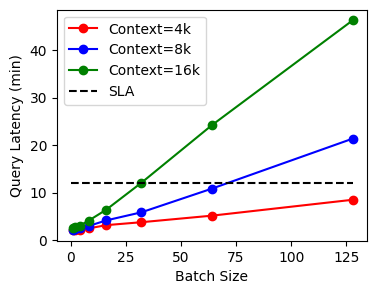

In [5]:
from figure_2a import load_QoS_file
import matplotlib.pyplot as plt

dic_GPU_70B_4k = load_QoS_file("data/GPU_70B_4k.csv")
dic_GPU_70B_8k = load_QoS_file("data/GPU_70B_8k.csv")
dic_GPU_70B_16k = load_QoS_file("data/GPU_70B_16k.csv")
dic_GPU_70B_32k = load_QoS_file("data/GPU_70B_32k.csv")

font=10

plt.figure(figsize=(4, 3))

plt.plot(dic_GPU_70B_4k["batch"], dic_GPU_70B_4k["latency"], marker='o', linestyle='-', color='Red', label="Context=4k")
plt.plot(dic_GPU_70B_8k["batch"], dic_GPU_70B_8k["latency"], marker='o', linestyle='-', color='Blue', label="Context=8k")
plt.plot(dic_GPU_70B_16k["batch"], dic_GPU_70B_16k["latency"], marker='o', linestyle='-', color='Green', label="Context=16k")

# Llama2-70B SLA
# https://mlcommons.org/2024/03/mlperf-llama2-70b/
# 512 Prefill + 3584 Decoding
SLA = (2 + 3584 * 0.2) / 60

plt.plot([0, 128], [SLA, SLA], linestyle='--', color='Black', label="SLA")
plt.legend(loc="upper left", fontsize=font)
plt.tick_params(axis='x', labelsize=font)
plt.tick_params(axis='y', labelsize=font)
plt.xlabel('Batch Size', fontsize=font)
plt.ylabel('Query Latency (min)', fontsize=font)
plt.show()

## Figure 11
[Supply Chain Model](https://github.com/PrincetonUniversity/ttm-cas/blob/main/supply_chain_model.py) is referred to: Ning, August and Tziantzioulis, Georgios and Wentzlaff, David, "[Supply Chain Aware Computer Architecture](https://dl.acm.org/doi/10.1145/3579371.3589052)]", ISCA 2023

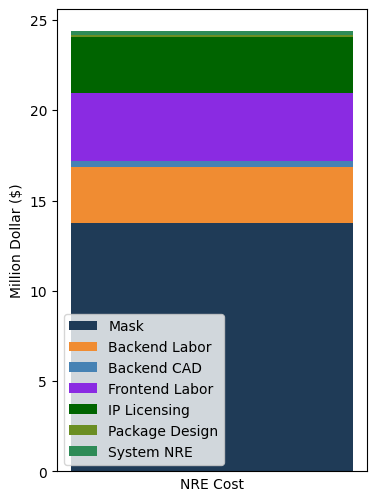

In [20]:
from cost_model.supply_chain_model import mw_mask_costs_arr, mw_ip_costs_arr, mw_backend_labor_cost_per_week, mw_backend_cad_license_per_eng_week, mw_frontend_labor_cost_per_week, mw_flip_chip_bga_package_design_cost, mw_system_NRE_cost

# inflation from 2016 to 2024 = 31%
# https://www.in2013dollars.com/us/inflation/2016?amount=1
inflation_factor = 1.31

pn_i = 10                   # 7nm processing node
CENT_frontend_eng_weeks = 52
CENT_frontend_num_engineers = 25
CENT_backend_eng_weeks = 52
CENT_backend_num_engineers = 25

Mask_Cost = mw_mask_costs_arr[pn_i] * inflation_factor
Backend_Labor_Cost = mw_backend_labor_cost_per_week * CENT_backend_num_engineers * CENT_backend_eng_weeks * inflation_factor
Backend_CAD_Cost = mw_backend_cad_license_per_eng_week * CENT_backend_eng_weeks * inflation_factor
Frontend_Labor_Cost = mw_frontend_labor_cost_per_week * CENT_frontend_num_engineers * CENT_frontend_eng_weeks * inflation_factor
IP_Licensing_Cost = mw_ip_costs_arr[pn_i] * inflation_factor
Packaging_Cost = mw_flip_chip_bga_package_design_cost * inflation_factor
System_Cost = mw_system_NRE_cost * inflation_factor
Total_NRE_Cost = Mask_Cost + Backend_Labor_Cost + Backend_CAD_Cost + Frontend_Labor_Cost + IP_Licensing_Cost + Packaging_Cost + System_Cost

import matplotlib.pyplot as plt
import numpy as np

# Data values (replace these with your actual values)
values = [Mask_Cost, Backend_Labor_Cost, Backend_CAD_Cost, Frontend_Labor_Cost, IP_Licensing_Cost, Packaging_Cost, System_Cost]  # Example values in million dollars
for i in range(len(values)):
    values[i] = values[i] / 1e6
labels = [
    "Mask", "Backend Labor", "Backend CAD", "Frontend Labor", 
    "IP Licensing", "Package Design", "System NRE"
]
colors = ["#1f3b57", "#f08c32", "#4682b4", "#8a2be2", "#006400", "#6b8e23", "#2e8b57"]

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(4, 6))
bottom = np.zeros(1)  # To stack bars

for i in range(len(values)):
    ax.bar(1, values[i], bottom=bottom, color=colors[i], label=labels[i])
    bottom += values[i]  # Move the bottom up

# Formatting
ax.set_xticks([])
ax.set_ylabel("Million Dollar ($)")
ax.set_xlabel("NRE Cost")
ax.legend()

plt.show()


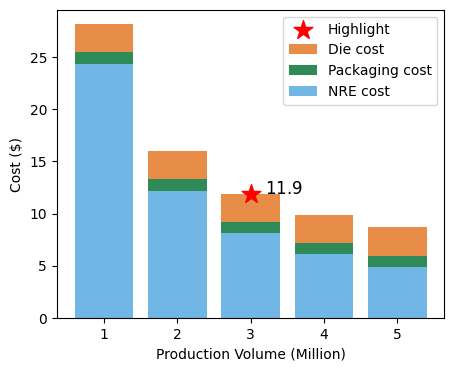

In [21]:
from cost_model.supply_chain_model import wafer_costs_arr, defect_density_vector_mm2, yield_rate, num_wafers_needed

pn_i = 10                   # 7nm processing node
CENT_product_volume = 3000000
CENT_PNM_die_size = 1.02
CENT_DRAM_controller_die_size = 4.5
CENT_DRAM_PHY_size = 10.8
CENT_PHIe_controller_PHY_size = 2.64
CENT_die_size = (CENT_PNM_die_size + CENT_DRAM_controller_die_size + CENT_DRAM_PHY_size + CENT_PHIe_controller_PHY_size)
CENT_yield_rate = yield_rate(CENT_die_size, defect_density_vector_mm2[pn_i], 3)
CENT_num_wafers_needed = num_wafers_needed(CENT_die_size, CENT_product_volume)
CENT_die_cost = wafer_costs_arr[pn_i] * CENT_num_wafers_needed / CENT_product_volume / CENT_yield_rate

# https://semiengineering.com/using-machine-learning-to-increase-yield-and-lower-packaging-costs/
# 2D packing accounts for 29% of Chip cost
CENT_package_cost = CENT_die_cost * 0.29/(1-0.29)

CENT_product_volume_list = [i * 10**6 for i in range(1, 6)]
Device_NRE_cost_list = [Total_NRE_Cost / i for i in CENT_product_volume_list]

import matplotlib.pyplot as plt
import numpy as np

# Sample raw data (replace with your actual data)
production_volume = [1, 2, 3, 4, 5]  # In millions
nre_cost = Device_NRE_cost_list        # NRE cost
packaging_cost = [CENT_package_cost] * 5  # Packaging cost
die_cost = [CENT_die_cost] * 5     # Die cost

# Stacked bar chart
fig, ax = plt.subplots(figsize=(5, 4))

# Plot bars
bar1 = ax.bar(production_volume, die_cost, bottom=np.array(nre_cost) + np.array(packaging_cost), color="#E88D48", label="Die cost")
bar2 = ax.bar(production_volume, packaging_cost, bottom=nre_cost, color="#2E8B57", label="Packaging cost")
bar3 = ax.bar(production_volume, nre_cost, color="#71B7E6", label="NRE cost")

# Highlight a specific bar (e.g., production volume 3)
highlight_x = 3
highlight_y = nre_cost[2] + packaging_cost[2] + die_cost[2]
ax.scatter(highlight_x, highlight_y, color='red', s=200, marker='*', label="Highlight")  # Red star marker
ax.text(highlight_x + 0.2, highlight_y, "$11.9$", fontsize=12, weight='bold')

# Labels and styling
ax.set_xlabel("Production Volume (Million)")
ax.set_ylabel("Cost ($)")
ax.set_xticks(production_volume)
ax.legend(loc="upper right")

# Show plot
plt.show()
